In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)

In [30]:
'''
somehow we need to get RNA data...
'''
from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnashapes import rnashapes_to_eden

def rfam_uri(family_id):
    return '%s.fa'%(family_id)
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

 
def get_graphs(rfam_id = 'RF00005'):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    graphs = rnashapes_to_eden(seqs, shape_type=5, energy_range=30, max_num=3)
    return graphs


Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476
>unnamed sequence 1 ['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA', '((((((...((((.......)))).(((((((...))))))).....(((((.......))))).)))))).', '(((((((((((((((.(((...((.(((((((...))))))))))))))))))).........)))))))).'] ['72', '[[][][]]', '[]']
we are in init ((((((...((((.......)))).(((((((...))))))).....(((((.......))))).)))))). GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
original


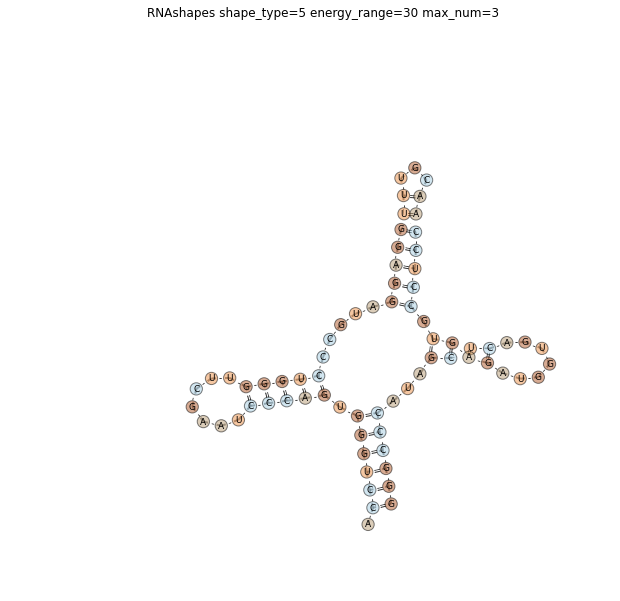

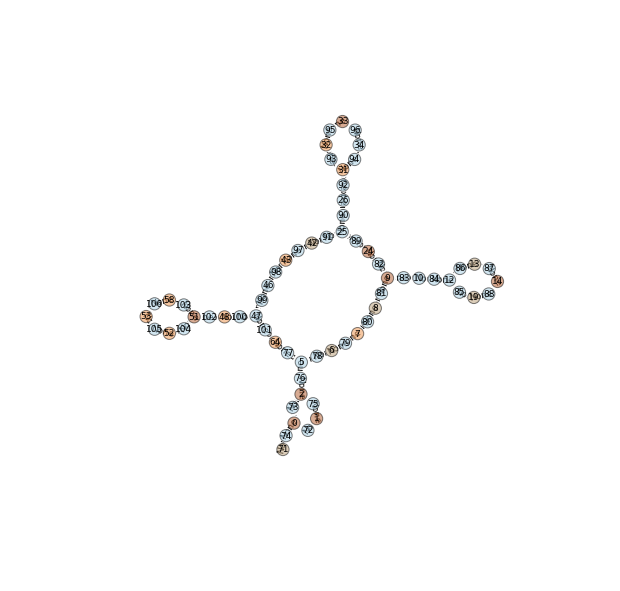

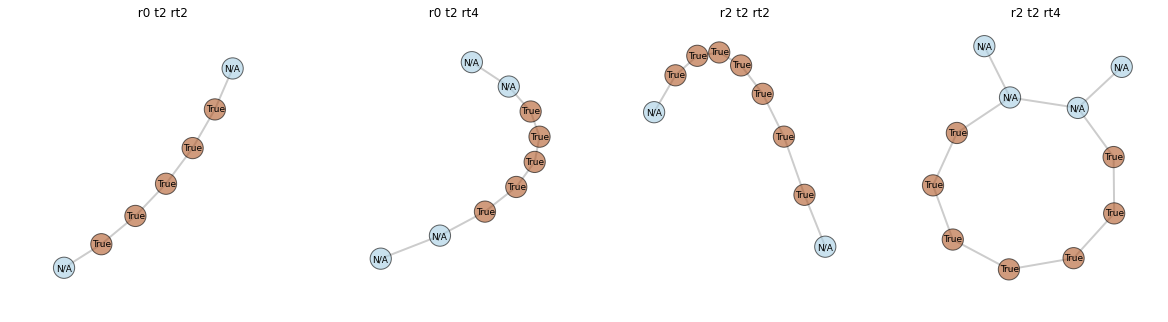

In [31]:
'''
first we test the core/interface extractor, since it is most essential
'''
import sys
sys.path.append('..')
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden


import graphlearn.ubergraphlearn as ul
import graphlearn.graphtools as gt
import graphlearn.utils.draw as myutils
import eden.graph as eg
import numpy as np

from eden.graph import Vectorizer
vectorizer=Vectorizer()

#get a graph
graphs = get_graphs()
graph=graphs.next()
from eden.util import display
from eden.modifier.graph.vertex_attributes import colorize  
graphs = colorize([graph],output_attribute = 'color_level', labels = ['C','A','U','G'])    
graph=graphs.next()
print 'original'
display.draw_graph(graph, size=10,
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, node_size=150)



def zomg(graph):
    return graph.graph['stuff']

def mark_and_draw(cips):
    #graph=myutils.cip_to_graph(cip)
    
    graph=[]
    for ci in cips:
        ci.graph.graph['stuff']='  r%d t%d rt%d' % (ci.radius,ci.abs_thickness,ci.thickness)
        graph.append(ci.graph)
    
    myutils.draw_graph_set_graphlearn(graph, 
                           n_graphs_per_line=4, size=5, 
                           colormap='Paired', invert_colormap=False,node_border=1,
                           vertex_alpha=0.6, edge_alpha=0.2, node_size=450, headlinehook=zomg, vertex_label='core')
    
radius_list=[0,2]
thickness_list=[2]
rtl=[2,4]
graph=vectorizer._edge_to_vertex_transform(graph)
#print 'expanded'
#myutils.display(graph,size=10,edge_label=None)
abs= ul.make_abstract(graph,vectorizer)

myutils.set_ids(abs)
display.draw_graph(abs, size=10,
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, node_size=150,vertex_label='id')


#print 'abstr'
#myutils.display(abs,size=10,edge_label=None)

cips=ul.extract_cips(
    53,
    abs,
    graph,
    abstract_radius_list=radius_list,
    abstract_thickness_list=thickness_list,
    real_thickness_list=rtl,
    vectorizer=vectorizer,
    filter=lambda x,y:True,
    hash_bitmask=2**20-1)
mark_and_draw(cips)


asd.ipynb		 EvaluatePredictivePerformanceOfSamples.ipynb  StickFigure.ipynb
bursi.neg.gspan		 EvaluateProbabilityOfSamples.ipynb	       StringGrammar.ipynb
bursi.pos.gspan		 Example.ipynb				       tmp
directed_sampling.ipynb  graphlearn				       UberSampler.ipynb
discsampler.ipynb	 interactive_creation.ipynb
/home/ikea/GraphLearn/example


In [33]:
%%time
'''
second is reading a grammar and training an estimator
'''
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.ubergraphlearn as ul
import itertools

# learn a grammar
graphs = get_graphs()
graphs = itertools.islice(graphs,4)

sampler=ul.UberSampler(radius_list=[0,1,2],thickness_list=[1,2],real_thickness_list=[1,2,3])
sampler.fit(graphs,n_jobs=4, core_interface_pair_remove_threshold=2, interface_remove_threshold=2)
sampler.save('tmp/rna_ubergrammar.ge')



Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476
>unnamed sequence 1 ['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA', '((((((...((((.......)))).(((((((...))))))).....(((((.......))))).)))))).', '(((((((((((((((.(((...((.(((((((...))))))))))))))))))).........)))))))).'] ['72', '[[][][]]', '[]']
we are in init ((((((...((((.......)))).(((((((...))))))).....(((((.......))))).)))))). GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
we are in init (((((((((((((((.(((...((.(((((((...))))))))))))))))))).........)))))))). GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
>unnamed sequence 1 ['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA', '(((((((........((.((((.(((((((.(((((...))))).))...))))).)))).))))))))).'] ['71', '[]']
we are in init (((((((........((.((((.(((((((.(((((...))))).))...))))).)))).))))))))

interface: 229995


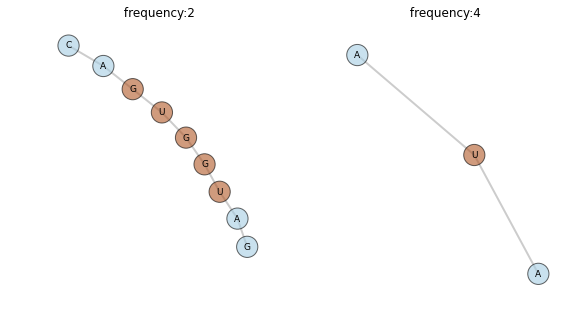

interface: 680727


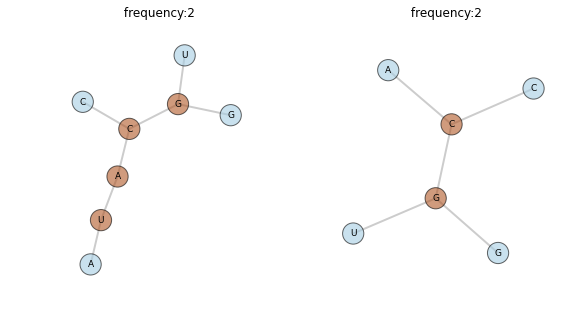

interface: 1574468


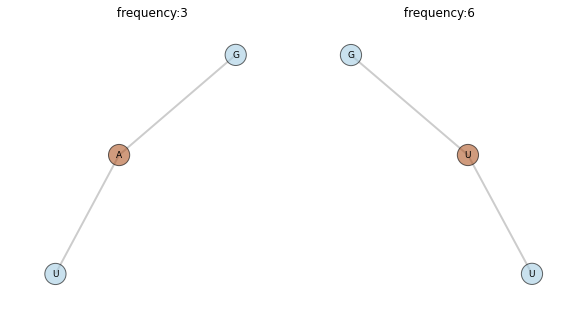

interface: 141800


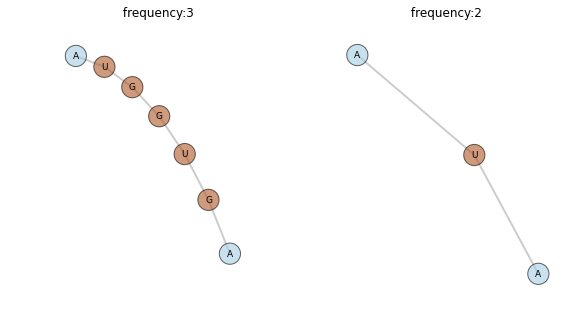

interface: 519300


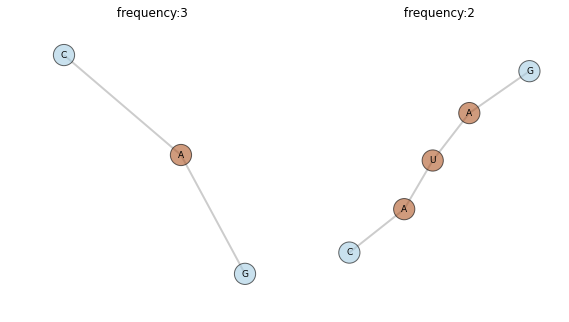

interface: 453780


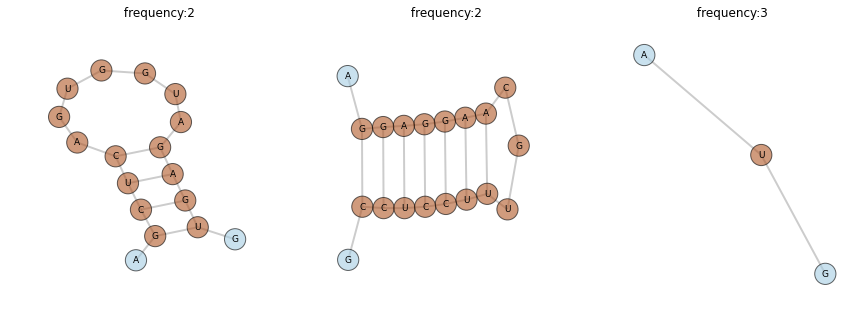

interface: 814392


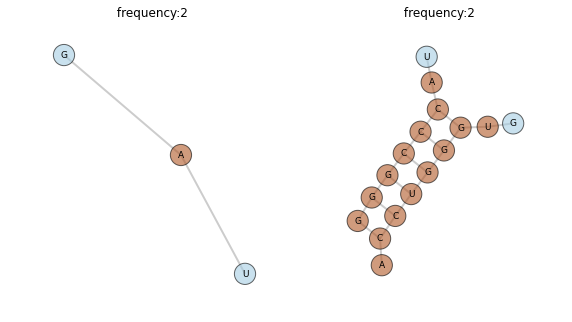

interface: 397019


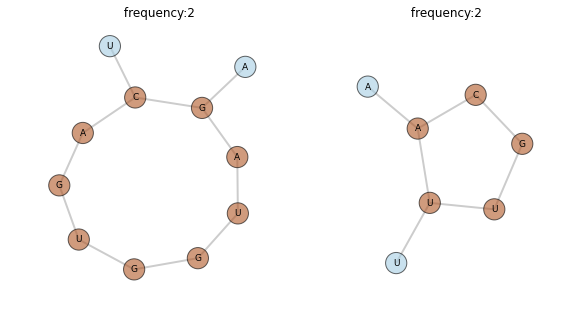

interface: 1330636


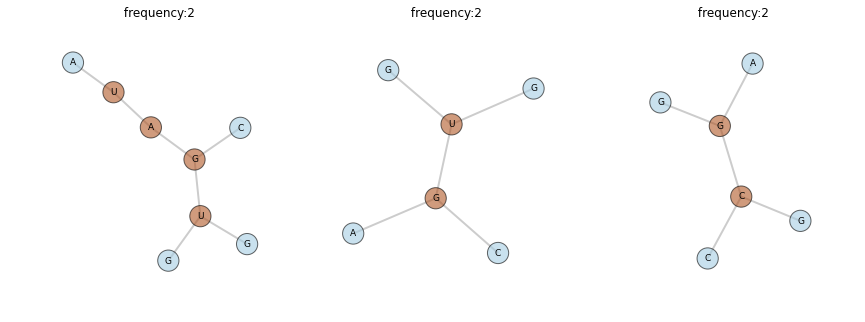

interface: 669167


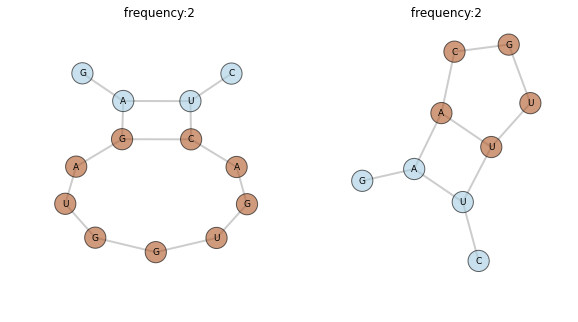

interface: 54316


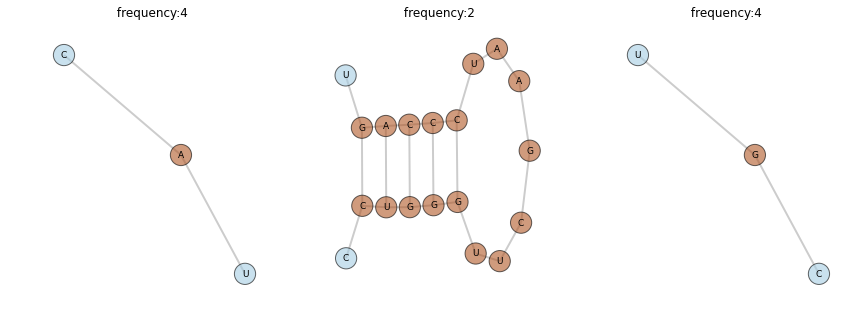

interface: 1407394


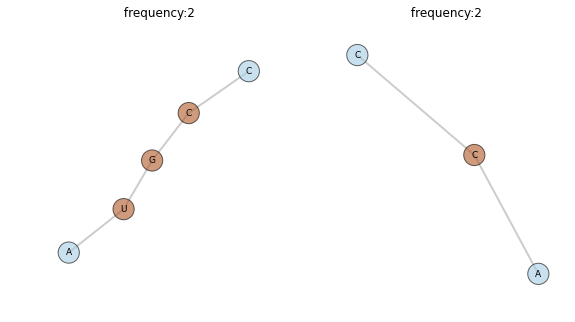

interface: 596735


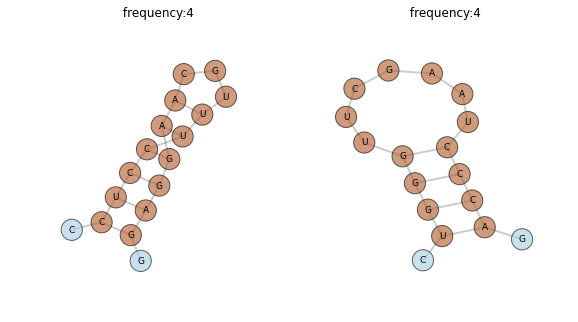

In [34]:
#draw production rules
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=20,
                     n_graphs_per_line=6, size=5, 
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

how often do we see interfacehashes
# productions: 29
x = # interfaces (total: 13)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


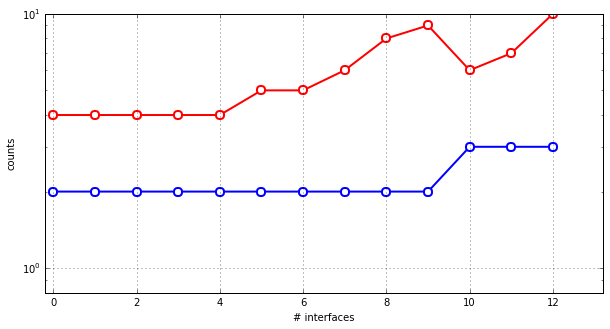

how often was this corehash seen?
x = # cores (total: 15)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


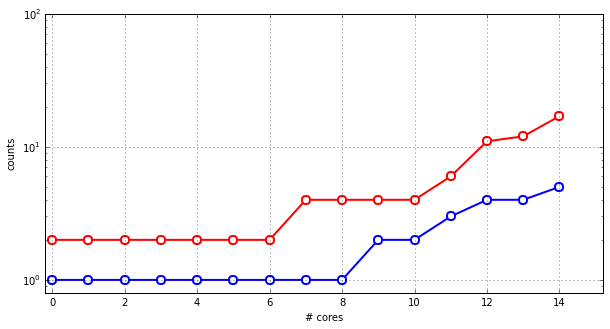

histogram
# productions: 29
distinct cores: 15 (seen on x axis)
interfaces with x many cores were observed y many times. 


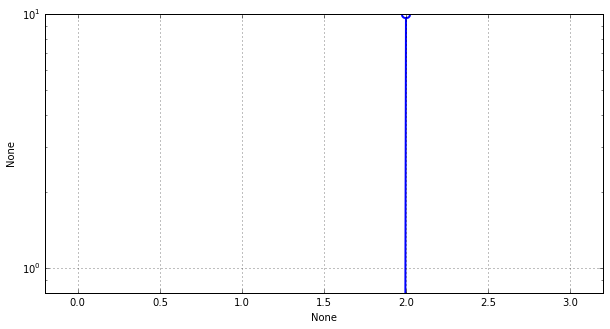

other histogram
how many cores exist with x many interfaces


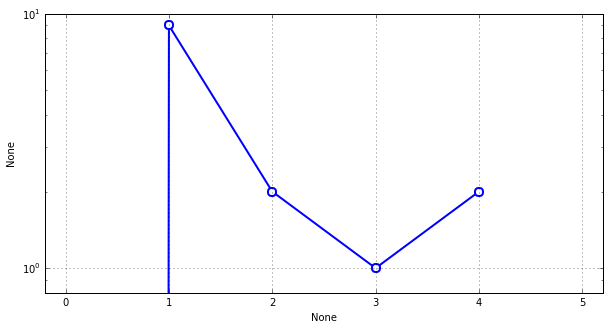

In [26]:
#grammar statistics
myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar, size=(10,5))

Loaded model: tmp/rna_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_annealing_factor: 1.0
accept_static_penalty: 0.0
batch_size: 1
   burnout: 0
complexity: 3
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1.86573626849e-05, average=False, class_weight=None,
       epsilon=0.1, eta0=0.41253876475, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=18, n_jobs=1,
       penalty='l1', power_t=0.863358833352, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimator.estimator instance at 0x7f29b1a37cf8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f29b1a37908>
generatormode: False
hash_bitmask: 1048575
keep_duplicates: True
local_substitutable_graph_grammar: <graphlearn.ubergraphlearn.UberGrammar object at 0x7f29b03b19d0>
    n_jobs: 1
   n_steps: 50
      nbit: 20
node_entity_check: <function <

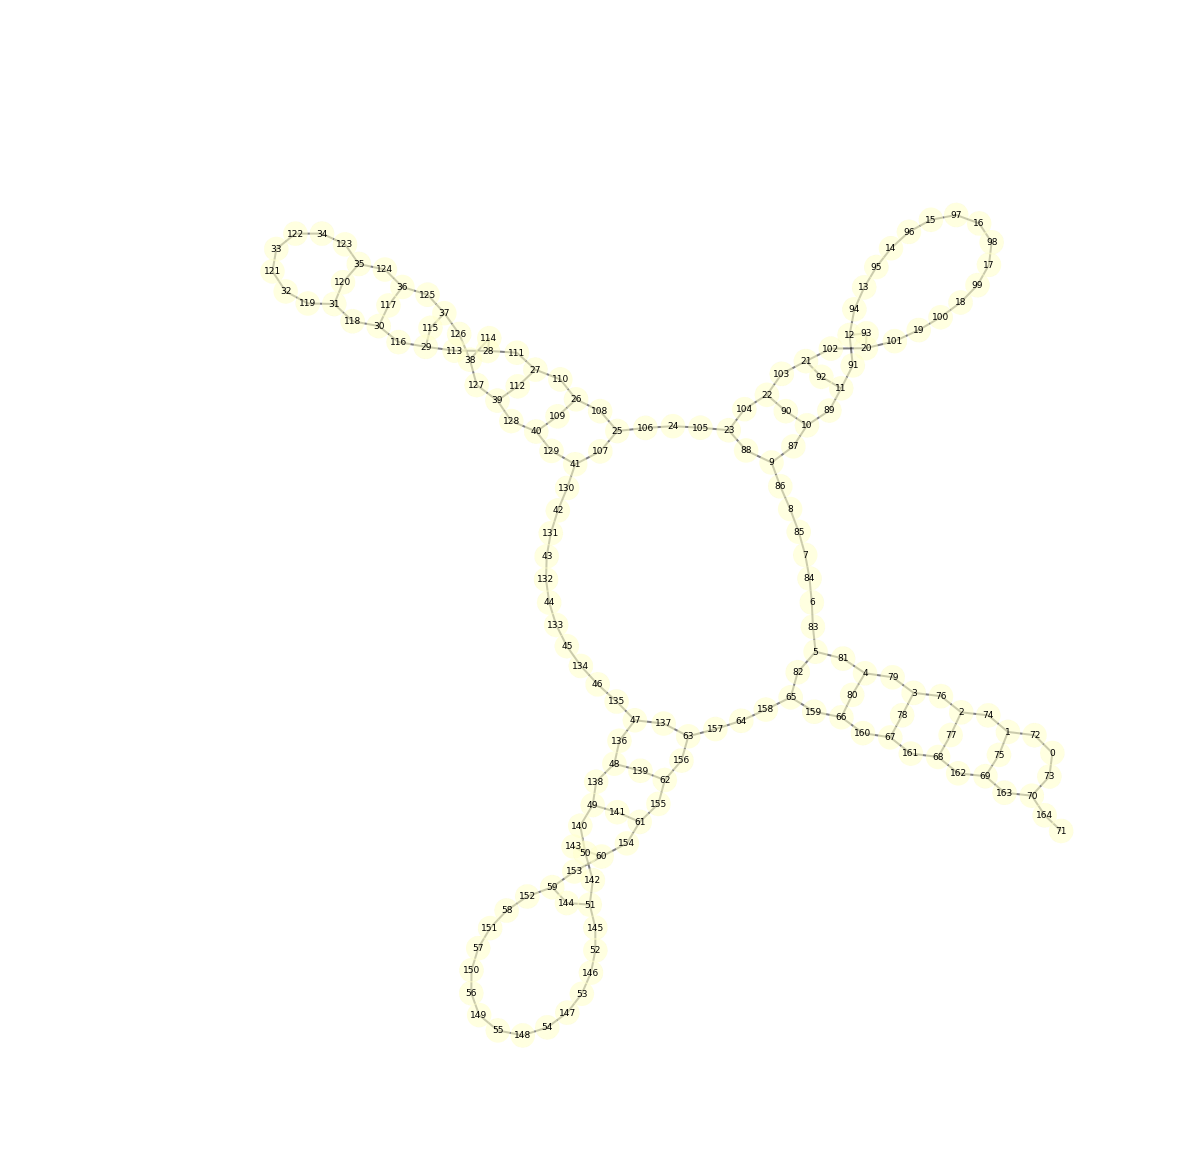

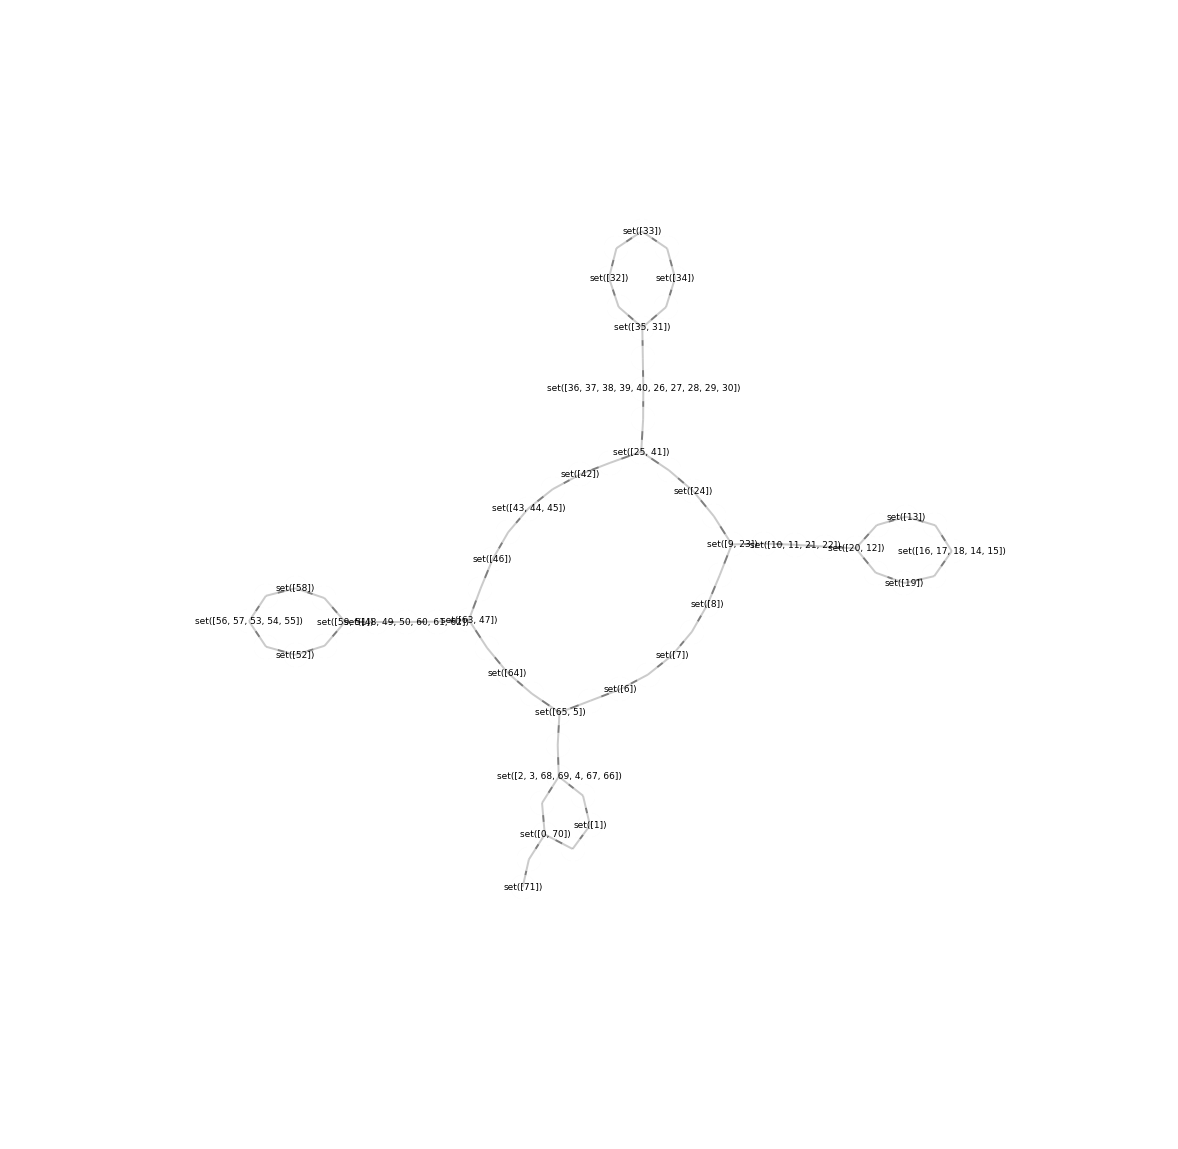

DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR END
DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR


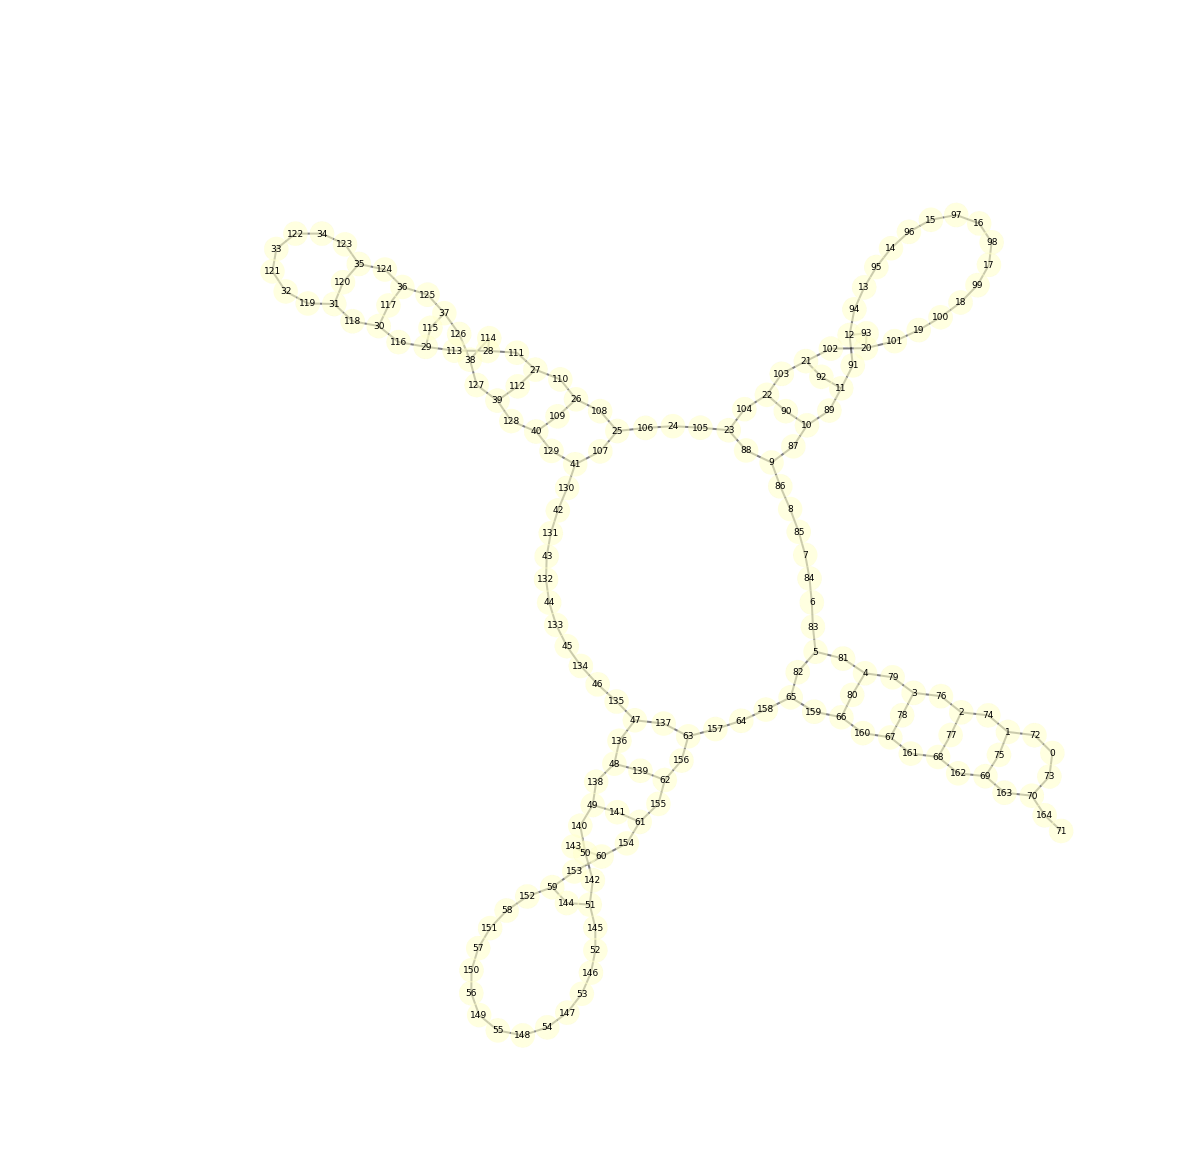

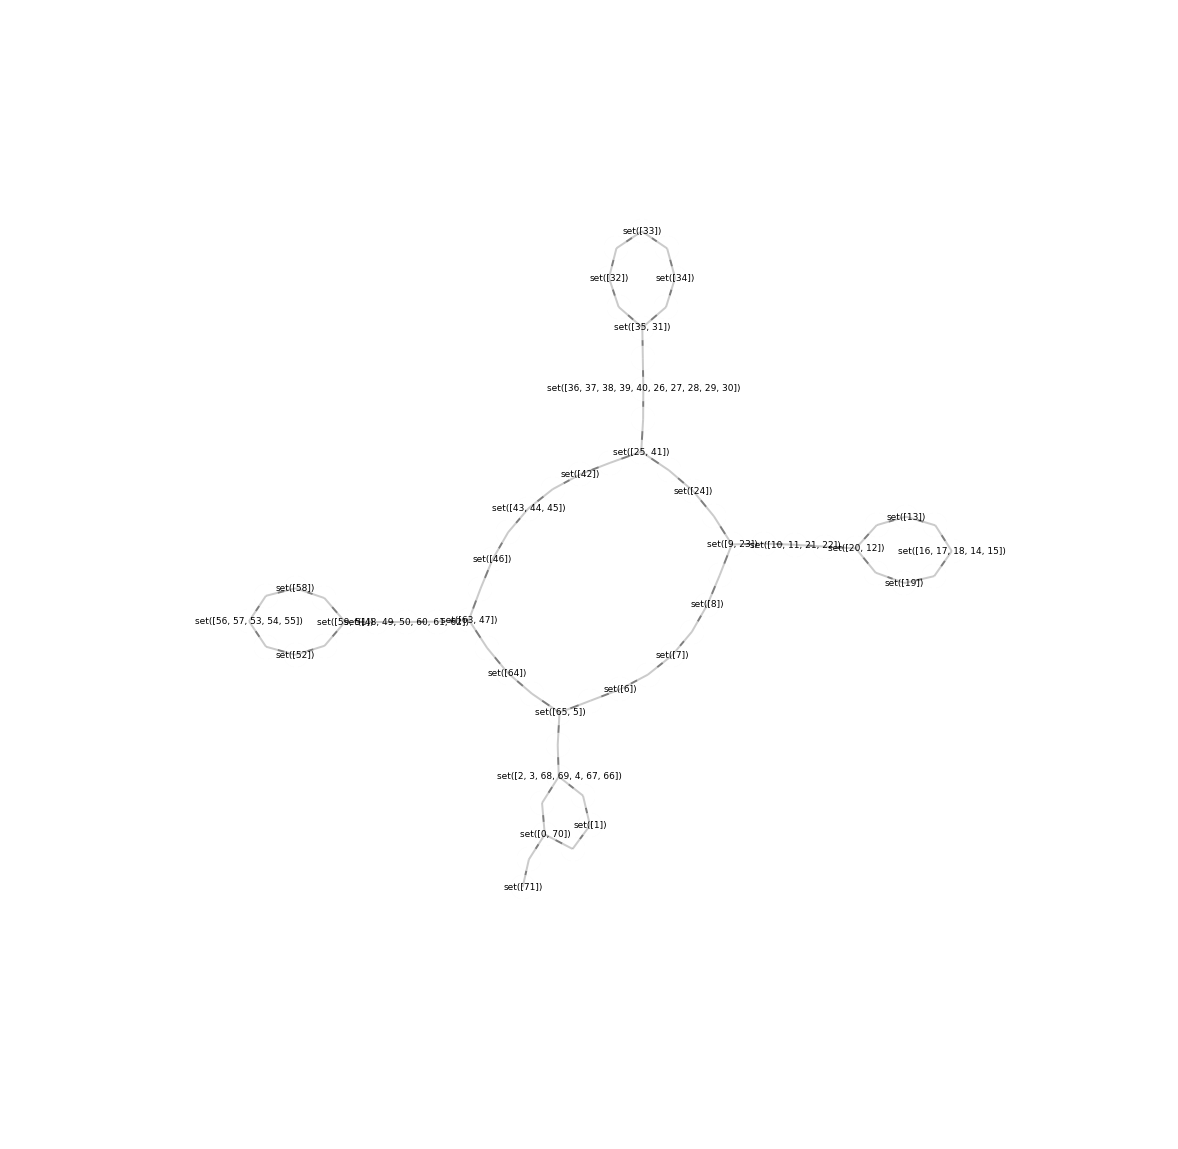

DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR END
DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR


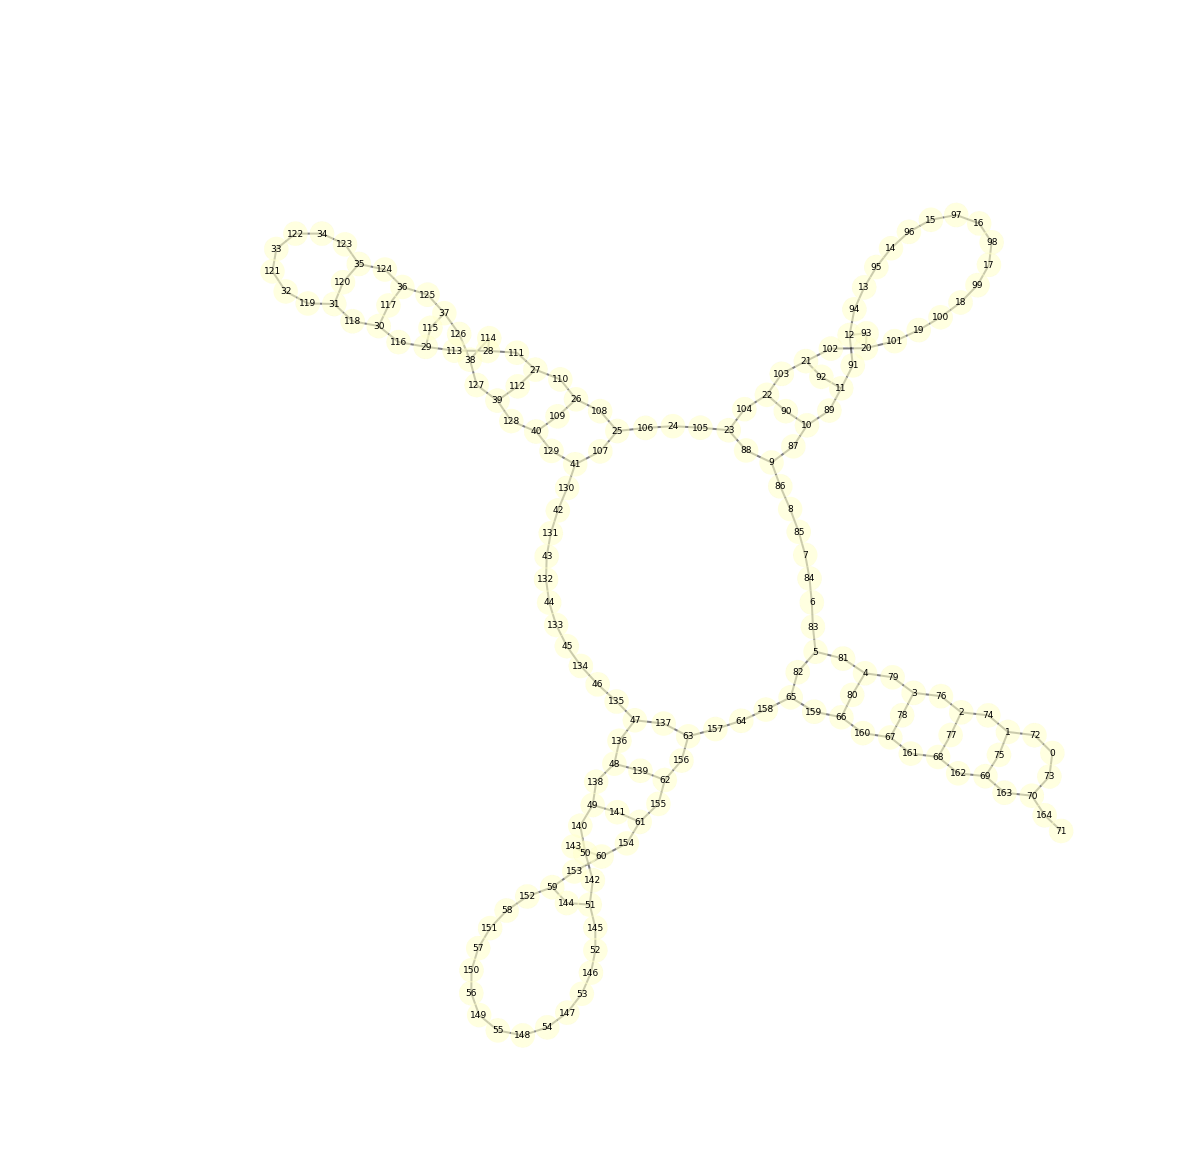

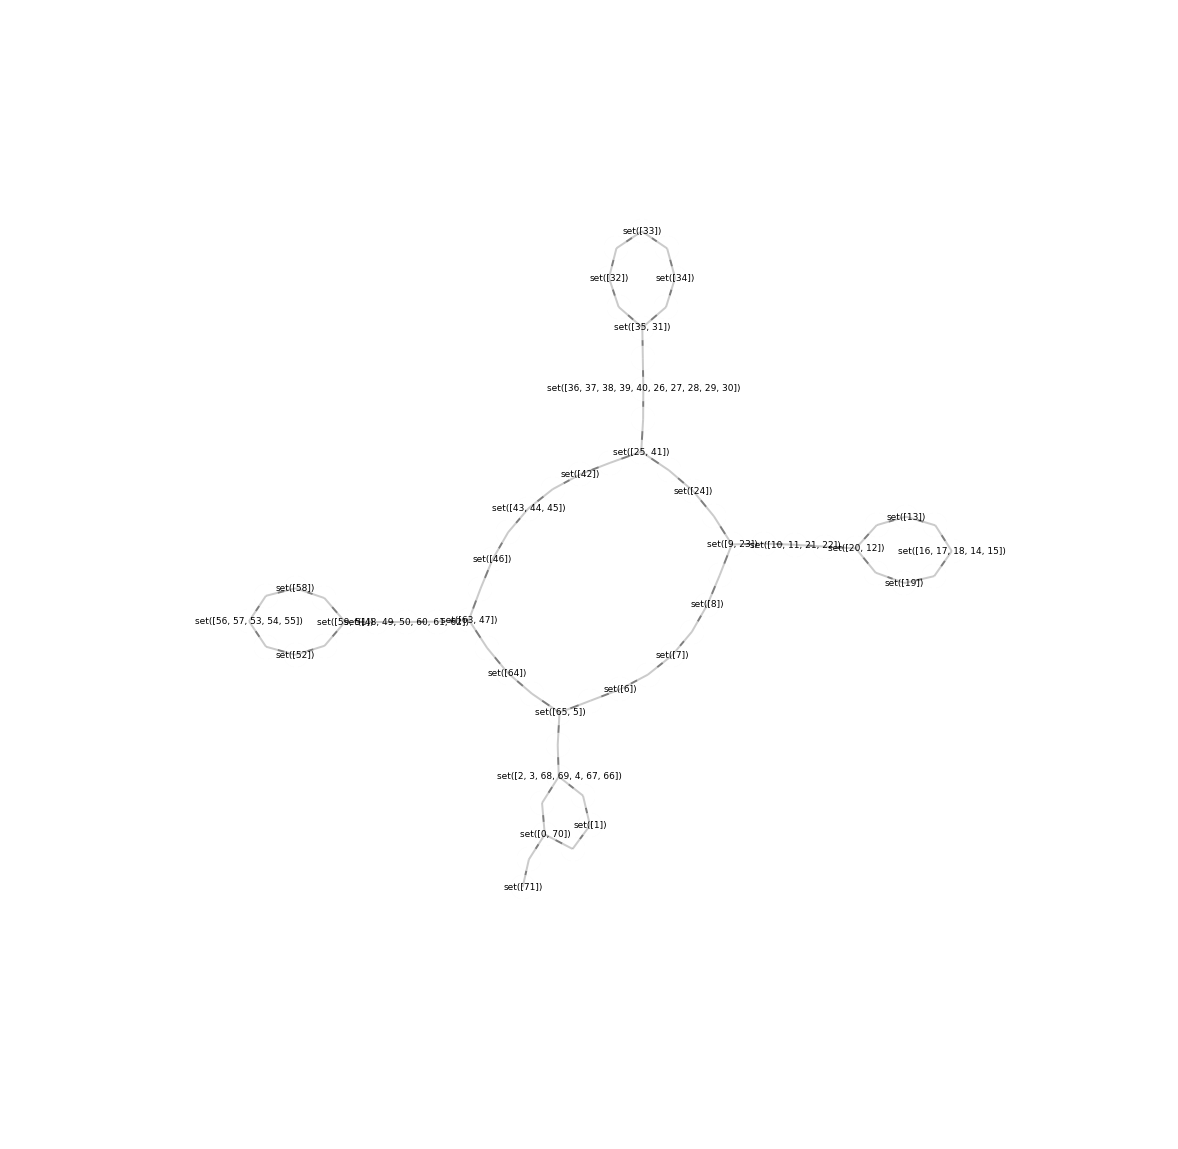

DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR END
Working with 2 cores
iteration:1
DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR


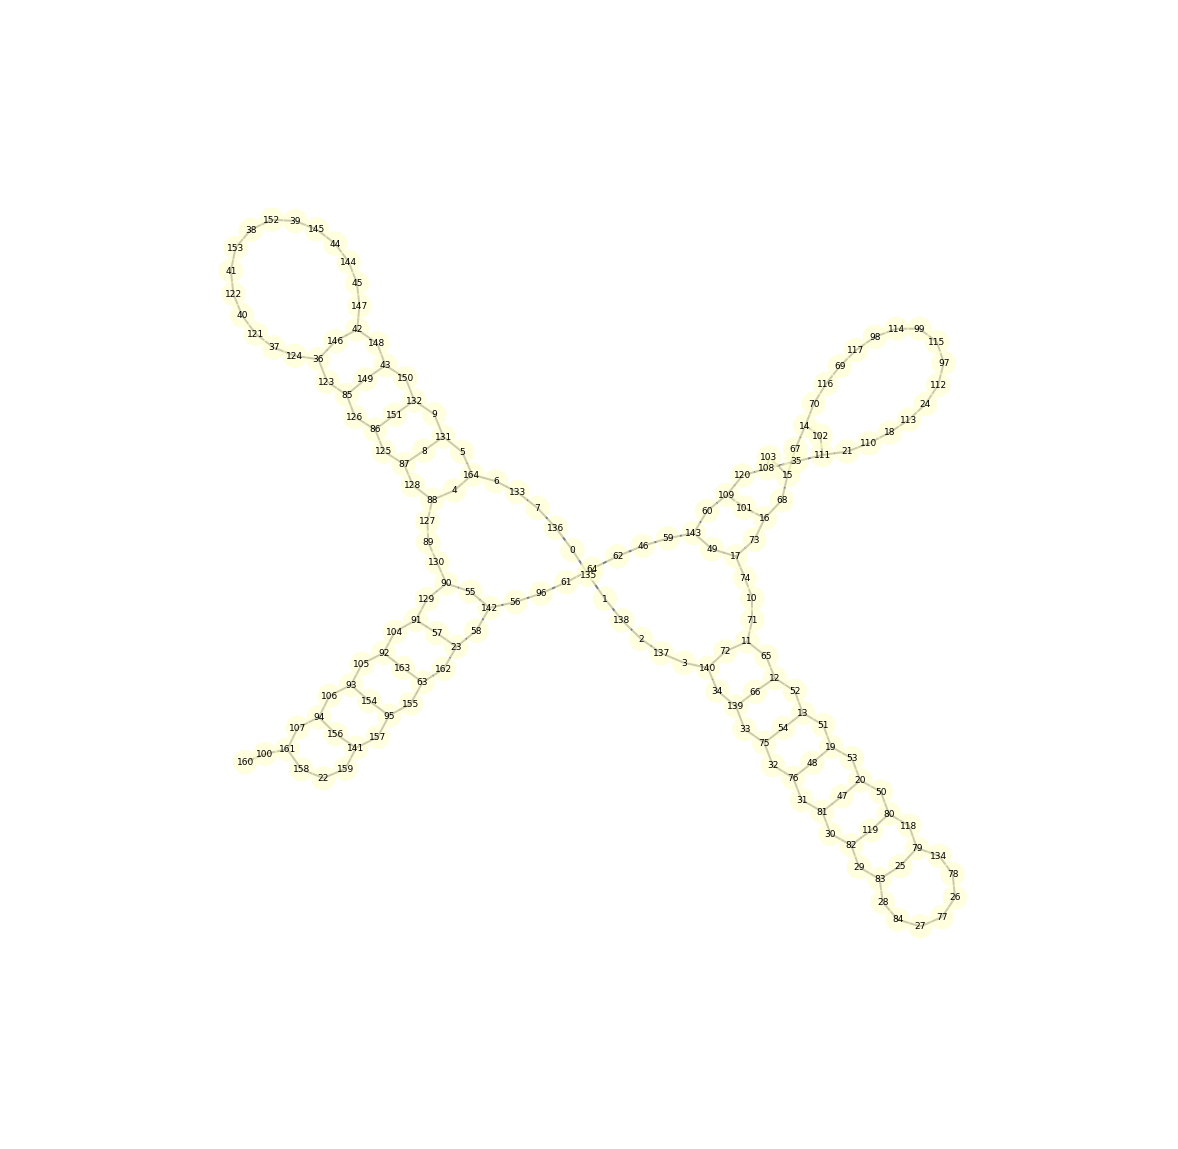

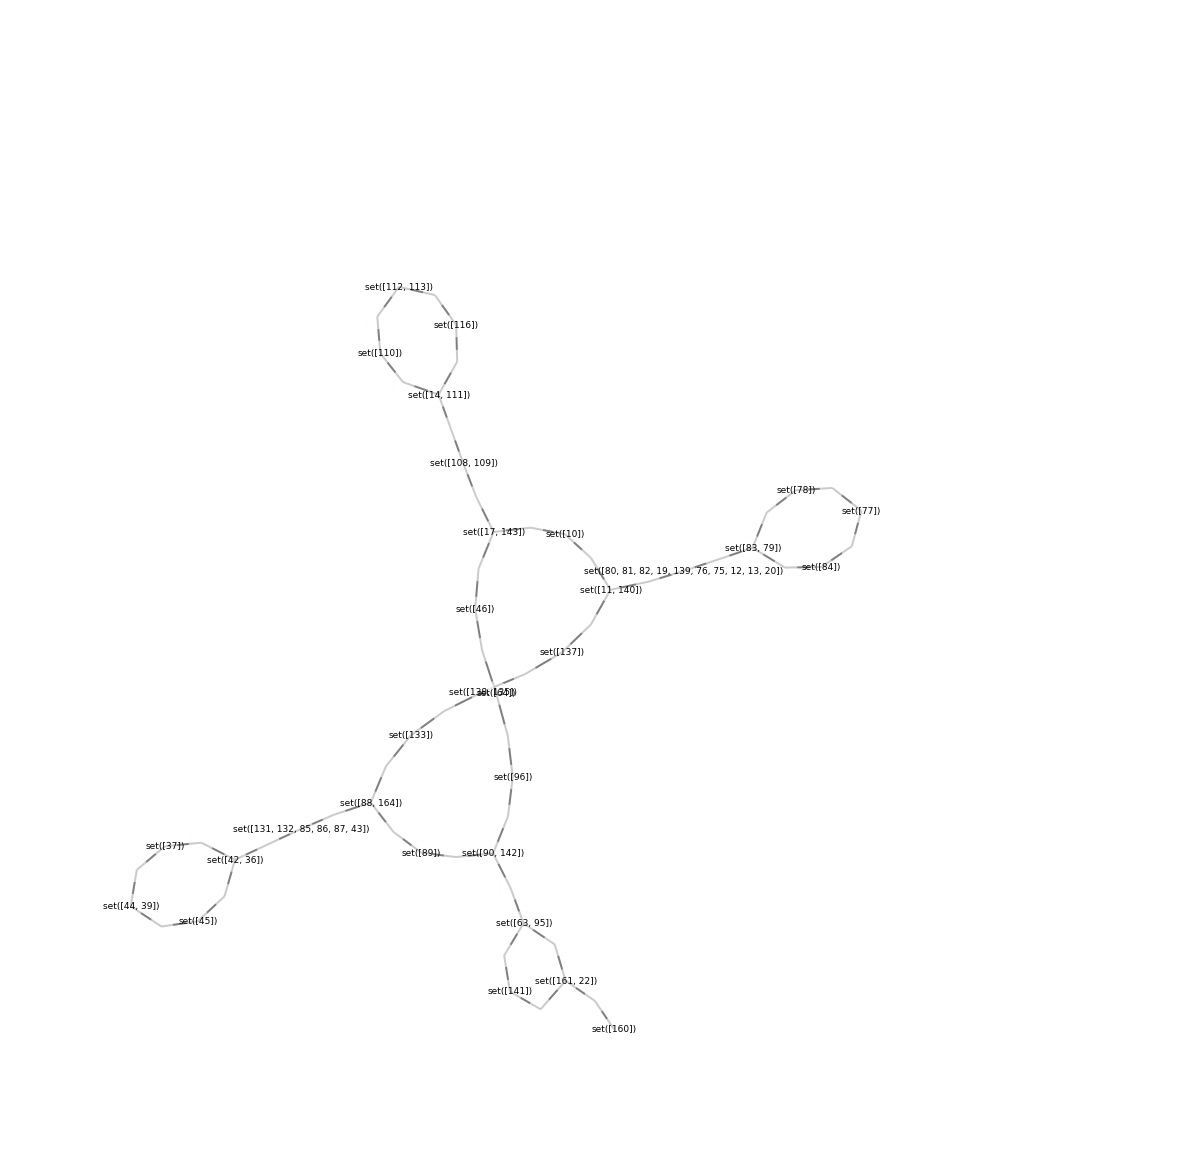

DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR END
136
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 228, in _sample
    candidate_graph = self._propose(graph)
  File "graphlearn/graphlearn.py", line 365, in _propose
    graph = self._propose_graph(graph)
  File "graphlearn/graphlearn.py", line 378, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "graphlearn/graphlearn.py", line 480, in select_original_cip
    cip = self._original_cip_extraction(graph)
  File "graphlearn/ubergraphlearn.py", line 55, in _original_cip_extraction
    abstr= make_abstract(graph,self.vectorizer)
  File "graphlearn/ubergraphlearn.py", line 178, in make_abstract
    if getabstr[n1]==getabstr[n2]:
KeyError: 136

Graph id: 0


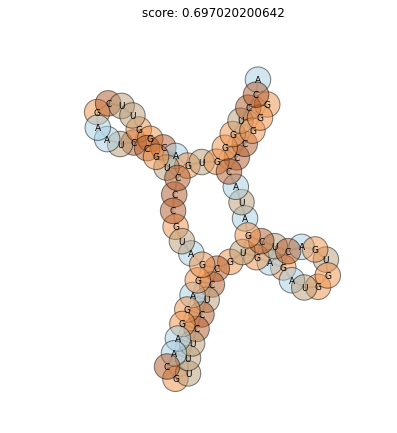

we are in init (((((((((((((((.(((...((.(((((((...))))))))))))))))))).........)))))))). GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA
iteration:0
DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR


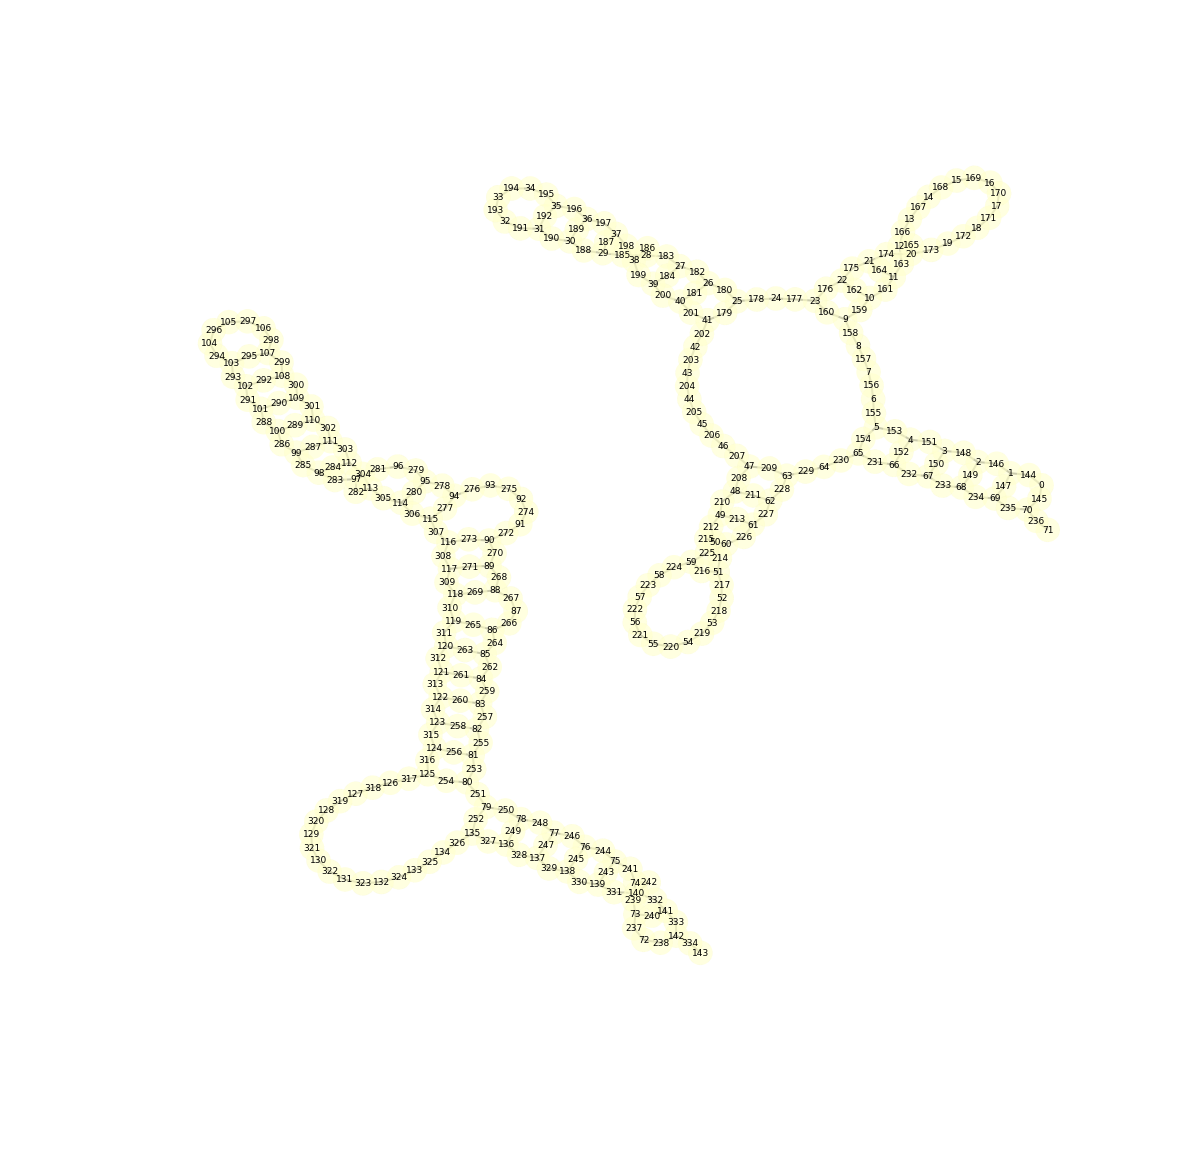

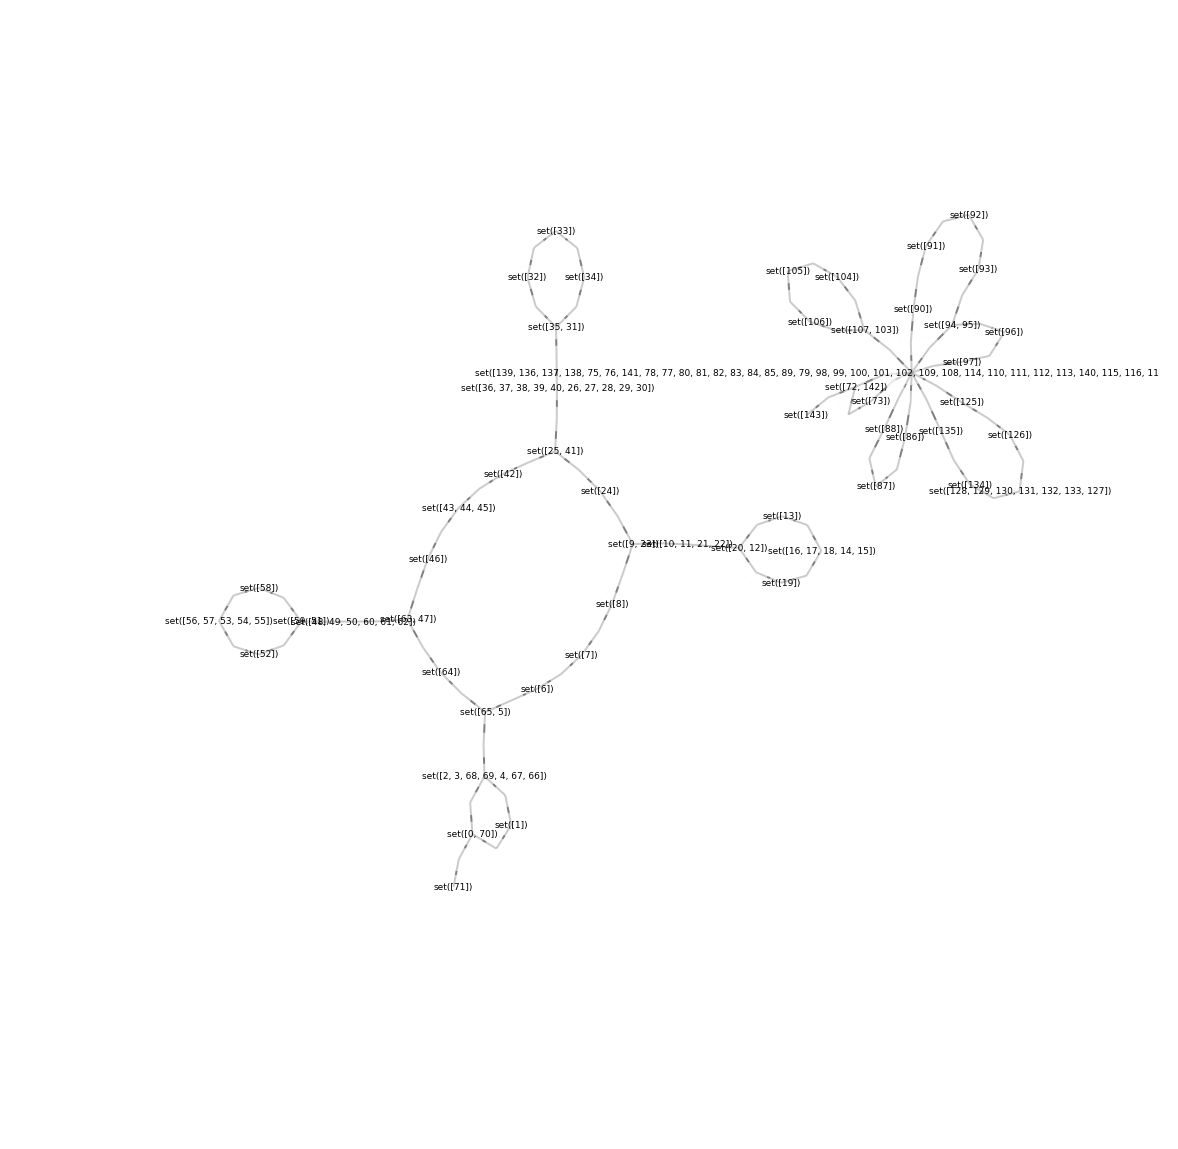

DEBUGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOR END
'hlabel'
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 228, in _sample
    candidate_graph = self._propose(graph)
  File "graphlearn/graphlearn.py", line 365, in _propose
    graph = self._propose_graph(graph)
  File "graphlearn/graphlearn.py", line 378, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "graphlearn/graphlearn.py", line 480, in select_original_cip
    cip = self._original_cip_extraction(graph)
  File "graphlearn/ubergraphlearn.py", line 65, in _original_cip_extraction
    hash_bitmask=self.hash_bitmask, filter=self.node_entity_check)
  File "graphlearn/ubergraphlearn.py", line 223, in extract_cips
    abstract_graph, radius_list=abstract_radius_list, thickness_list=abstract_thickness_list,vectorizer=vectorizer,**argz)
  File "graphlearn/graphtools.py", line 120, in extract_core_and_interface
    corehash = calc_core_hash(master_cip_graph.subgraph(core_graph_nodes), hash_bit

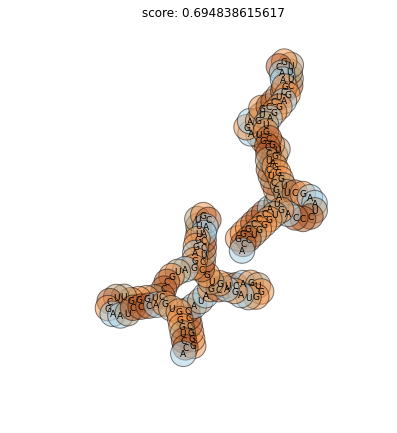

CPU times: user 11.3 s, sys: 828 ms, total: 12.1 s
Wall time: 14.1 s


In [42]:
%%time
'''
Graph sampling
'''
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.ubergraphlearn as ul
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=ul.UberSampler()
sampler.load('tmp/rna_ubergrammar.ge')
graphs = get_graphs()

id_start=0
id_end=id_start+2
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50

graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=False,
                        n_samples=4,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        accept_annealing_factor=1.0,
                        probabilistic_core_choice=True,
                        burnout=0,
                        select_cip_max_tries=100,
                        keep_duplicates=True)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=6, size=7, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650,
                          headlinehook= myutils.get_score_of_graph
                          )

In [ ]:
%matplotlib inline
from itertools import islice
import numpy as np
step=sampling_interval
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [ ]:
import networkx as nx

In [ ]:
g=nx.path_graph(2)

In [ ]:
dir(g)

In [ ]:
g.__dict__